### Unsupervised ML - RFM approach (Recency Frequency Monetary)
- Recency means suppose there is a walmart and you're analysing how many customers visited your shop in last 10 years , last (recency) transaction done by customer , eg- 2 customers A and B , A's last transacrion - 18th april,2025 and B's last transaction - 18th April ,2024  so A is more imp for us because chances of coming of A is more as compared to B 
- Frequency is how many times a customer visited the store  more the freq more imp is the customer
- Monetary is per customer's spending and profit earned due to visiting of any cutomer .
- Good customers are the ones who are visiting frequently , have visited recently and spending with high monetary value
- You can add this project in your cv with recommendation system if applying for amazon,flipkart,prime,netflix,air bnb, oyo , etc.

- [Extra notes from pdf]

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('E-com_Data.csv')
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


# Task 
1. Data cleaning and Exploratory Data Analysis (Detailed)
2. Customer segmentation using recency frequency monetary analysis (RFM)
3. Customer segmentation using K-means , Hierarchial , DBSCAN (To remove outliers , density based scan)
4. Analysis of customer retention rate  using cohort analysis

#### Part 1 : Data cleaning and EDA
- Identify missing values and noise in the dataset
- Cleaning and visualising the data
- Conducting analysis by invoice , product and other variables 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,404189.0,2181.909035,1252.681881,2.0,1207.0,2078.0,3291.0,4372.0
InvoieNo,537979.0,385017.572063,13426.052649,361429.0,372961.0,385706.0,396873.0,406651.0
Quantity,537979.0,9.343339,27.623322,-2003.0,1.0,3.0,10.0,3186.0
price per Unit,537979.0,378.339062,440.048823,1.0,169.0,261.0,456.0,64973.0
Price,537979.0,2161.414593,4538.487177,-10152.0,451.0,1194.0,2232.0,90400.0
Sold as set,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [9]:
# CustomerID - Mandatory 
# InvoiceNo - Frequency
# DataOfPurchase - Recency 
# Price - Monetary
# Rest var not required because we only need to analyse using RFM approach(unsupervised)

In [10]:
drop_cols=['Item Code','Quantity','Time','price per Unit','Cancelled_status','Reason of return','Sold as set']
df.drop(drop_cols,axis=1,inplace=True)
# Dropped columns not needed for RFM

In [11]:
df.duplicated().sum()

5662

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
# Negative price indicates return in money hence negative 
# Return will be a loss because customer is not paying the transporation cost suffered by the company

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,403034.0,2182.099456,1252.675395,2.0,1207.0,2078.0,3291.0,4372.0
InvoieNo,535453.0,385010.770370,13419.380835,361429.0,372962.0,385665.0,396843.0,406651.0
Price,535453.0,2167.172036,4546.765442,-10152.0,453.0,1200.0,2233.0,90400.0


In [16]:
def missing_values(df):
    missing_number=df.isnull().sum().sort_values(ascending=False)
    missing_percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values=pd.concat([missing_number,missing_percent],axis=1,keys=['missing_number','missing_number'])
    return missing_values[missing_values['missing_number']>0]

In [17]:
# df.isnull().count()
# This gives the total number of rows per column (same for all columns unless some rows are dropped).

# Essentially tells how many entries exist in each column (even if some are NaN, they are still counted).

# 4. (df.isnull().sum() / df.isnull().count())
# This divides the number of missing values in each column by the total number of rows.

# Result: fraction (or percentage) of missing data in each column.

In [18]:
missing_values(df)

,missing_number,missing_number
CustomerID,132420,0.247304
InvoieNo,1,0.000002
Date of purchase,1,0.000002
Price,1,0.000002
Shipping Location,1,0.000002


In [19]:
# without customer we can't do marketing hence it is a mandatory field
# so we have to drop all the customer inf where customer id is null
# Before dropping you've to ask your client if number is big

In [20]:
df=df.dropna(subset=['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403034 entries, 0 to 537949
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         403034 non-null  float64
 1   InvoieNo           403034 non-null  float64
 2   Date of purchase   403034 non-null  object 
 3   Price              403034 non-null  float64
 4   Shipping Location  403034 non-null  object 
dtypes: float64(3), object(2)
memory usage: 18.4+ MB


In [21]:
missing_values(df)

,missing_number,missing_number
CustomerID,NaN,NaN
InvoieNo,NaN,NaN
Date of purchase,NaN,NaN
Price,NaN,NaN
Shipping Location,NaN,NaN


In [22]:
import datetime 
df['Date of purchase']=pd.to_datetime(df['Date of purchase'])

In [23]:
df = df.rename(columns={'InvoieNo':'InvoiceNo','Date of purchase':'Date'})

In [24]:
df.head()

,CustomerID,InvoiceNo,Date,Price,Shipping Location
0,4355.0,398177.0,2017-10-29,1926.0,Location 1
1,4352.0,394422.0,2017-10-05,1740.0,Location 1
2,4352.0,394422.0,2017-10-12,1866.0,Location 1
3,4352.0,388633.0,2017-08-22,1869.0,Location 1
4,4352.0,394422.0,2017-10-10,1888.0,Location 1


In [25]:
df['Date'].describe().T

count                           403034
mean     2017-07-15 14:29:49.129453056
min                2016-12-02 00:00:00
25%                2017-04-12 00:00:00
50%                2017-08-05 00:00:00
75%                2017-10-26 00:00:00
max                2017-12-19 00:00:00
Name: Date, dtype: object

In [26]:
# min in date indicates when first transaction happened and max indicates when last happened
# count indicates number of transactions

In [27]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
CustomerID,403034.0,2182.099456,2.0,1207.0,2078.0,3291.0,4372.0,1252.675395
InvoiceNo,403034.0,385643.386067,361429.0,374193.0,386934.0,397130.0,406651.0,13106.850849
Date,403034,2017-07-15 14:29:49.129453056,2016-12-02 00:00:00,2017-04-12 00:00:00,2017-08-05 00:00:00,2017-10-26 00:00:00,2017-12-19 00:00:00,NaN
Price,403034.0,2477.137396,-10152.0,556.0,1572.0,2496.0,90400.0,4896.20323


In [28]:
df['CustomerID'].nunique() # Unique customers who visited the store

4349

In [29]:
new_date=datetime.datetime(2017,12,20) # One day ahead of last date 

In [30]:
# You've to do eda on your own without dropping prev columns

In [31]:
# Customer segemntation using RFM analysis

### RFM approach / Analysis is a marketing technique and method used to evaluate customer behaviours.
- RFM stands for **Recency** , **Frequency** and **Monetrory**

### **Recency** : Represents how recently a customer has made a purchase , more recently visited/purchased customers have a higher recency score (good customers)
### **Frequency** : Represents how may times a customer has made a purchase within a specific time period (typically within a year). Customer who purchase more frequently hav  higher frequency score
### **Monetary** : Refers to the the total amount a customer has spent within a specific time period . Customers who spend more have a higher monetary score.

- If recency score is less customer is good and vice versa (inversely proportional)
- But if monetary and frequency is less then customer is a bad customer (directly proportional)

- A score of **3** represent best customers (more recent , most frequent , and highest spending)
- A score of **12** represent least engaged customers

- **VIP/Prime Customers**
- **Loyal customers**
- **Potential customers**

In [36]:
# RFM Approach
RFMApproach = df.groupby('CustomerID').agg({'Date': lambda x: (new_date - x.max()).days,
                                            'InvoiceNo':lambda x:x.count(),
                                            'Price': lambda x:x.sum()})

RFMApproach.rename(columns = {'Date':'Recency','InvoiceNo':'Frequency','Price':'Monetary'},inplace=True)

RFMApproach.reset_index() # Because group by will create difficulty in indexing

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0
...,...,...,...,...
4344,4368.0,278,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,9,13,24962.0
4347,4371.0,4,751,279720.0


In [37]:
# Hopkin's test

In [38]:
RFMApproach.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4349.0,93.299379,100.701315,1.0,18.0,51.0,144.0,381.0
Frequency,4349.0,92.672798,230.957040,1.0,17.0,42.0,101.0,7930.0
Monetary,4349.0,229563.254334,855864.081658,-50372.0,38140.0,83635.0,205509.0,35482553.0


In [39]:
# split the data into 4 segments basis quantile method

quantiles= RFMApproach.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205509.0}}

In [40]:
# Analyse this yourself 
# eg 1 to 18 first categ , sim9larly 3 more categ

In [41]:
def Recency_value(x,p,d):
    if x<= d[p][0.25]: # p means percentile, d means dataset
        return 1
    elif x<=d[p][0.5]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4
    

In [42]:
# In recency categ 1 is good , categ 2 is average , categ 3 is below average and categ 4 is not good
# In frequency and monetary categ 1 is not good , 2 is below avg , 3 is avg and 4 is good

In [43]:
def Freq_Monet_value(x,p,d):
    if x<= d[p][0.25]: # p means percentile, d means dataset
        return 4
    elif x<=d[p][0.5]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

In [44]:
# Now we have just performd the reverse of recency value so categ 1 of customers are good , categ 2 avg , 3 is below avg , 4 is not good

In [45]:
RFMApproach['R']= RFMApproach['Recency'].apply(Recency_value,args=('Recency',quantiles))
RFMApproach['F']= RFMApproach['Frequency'].apply(Freq_Monet_value,args=('Frequency',quantiles))
RFMApproach['M']= RFMApproach['Monetary'].apply(Freq_Monet_value,args=('Monetary',quantiles))

In [46]:
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,2.0,4,182,553704.0,1,1,1
1,3.0,77,27,257404.0,3,3,1
2,4.0,19,72,176613.0,2,2,2
3,5.0,311,16,41976.0,4,4,3
4,6.0,37,84,151822.0,2,2,2
...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,9,13,24962.0,1,4,4
4347,4371.0,4,751,279720.0,1,1,1


In [47]:
# R,F and M =111 Prime customer

In [48]:
RFMApproach['RFM']=RFMApproach[['R','F','M']].sum(axis=1)
RFMApproach

,Recency,Frequency,Monetary,R,F,M,RFM
CustomerID,,,,,,,
2.0,4,182,553704.0,1,1,1,3
3.0,77,27,257404.0,3,3,1,7
4.0,19,72,176613.0,2,2,2,6
5.0,311,16,41976.0,4,4,3,11
6.0,37,84,151822.0,2,2,2,6
...,...,...,...,...,...,...,...
4368.0,278,10,20480.0,4,4,4,12
4369.0,181,7,10774.0,4,4,4,12
4370.0,9,13,24962.0,1,4,4,9


In [49]:
# Where ever RFM = 3 , prime customer

In [50]:
# NOW we can share this report to the business makers and it will be more understandeable by them

In [51]:
RFMApproach['RFM'].value_counts()

RFM
10    508
3     471
7     461
9     458
8     447
5     439
12    410
6     405
11    380
4     370
Name: count, dtype: int64

In [52]:
# Now we have 10 clusters , by using k means or qcut we can have 4 clusters 

In [53]:
Loyalty_Level=['Platinum','Gold','Silver','Bronze']
score_cuts=pd.qcut(RFMApproach['RFM'],q=4,labels=Loyalty_Level)
RFMApproach['Loyalty_Level']=score_cuts.values
RFMApproach.reset_index(inplace=True) # If we not do this then cust id becomes index

In [54]:
RFMApproach

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Loyalty_Level
0,2.0,4,182,553704.0,1,1,1,3,Platinum
1,3.0,77,27,257404.0,3,3,1,7,Gold
2,4.0,19,72,176613.0,2,2,2,6,Gold
3,5.0,311,16,41976.0,4,4,3,11,Bronze
4,6.0,37,84,151822.0,2,2,2,6,Gold
...,...,...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4,12,Bronze
4345,4369.0,181,7,10774.0,4,4,4,12,Bronze
4346,4370.0,9,13,24962.0,1,4,4,9,Silver
4347,4371.0,4,751,279720.0,1,1,1,3,Platinum


In [55]:
RFMApproach['Loyalty_Level'].value_counts()

Loyalty_Level
Gold        1313
Platinum    1280
Silver       966
Bronze       790
Name: count, dtype: int64

In [56]:
final_report=RFMApproach.groupby('Loyalty_Level')[['Recency','Frequency','Monetary','CustomerID']].agg({'Recency':'sum','Frequency':'sum','Monetary':'sum','CustomerID':'nunique'}).reset_index()

In [57]:
final_report

,Loyalty_Level,Recency,Frequency,Monetary,CustomerID
0,Platinum,25971,294778,763514614.0,1280
1,Gold,84142,75937,166091387.0,1313
2,Silver,121714,23731,50220946.1,966
3,Bronze,173932,8588,18543646.0,790


In [58]:
final_report=final_report.rename(columns={'CustomerID':'NumOfBuyers'})

In [59]:
final_report

,Loyalty_Level,Recency,Frequency,Monetary,NumOfBuyers
0,Platinum,25971,294778,763514614.0,1280
1,Gold,84142,75937,166091387.0,1313
2,Silver,121714,23731,50220946.1,966
3,Bronze,173932,8588,18543646.0,790


In [60]:
final_report['Percent']=round(final_report['NumOfBuyers']/final_report['NumOfBuyers'].sum() * 100,2)


In [61]:
final_report

,Loyalty_Level,Recency,Frequency,Monetary,NumOfBuyers,Percent
0,Platinum,25971,294778,763514614.0,1280,29.43
1,Gold,84142,75937,166091387.0,1313,30.19
2,Silver,121714,23731,50220946.1,966,22.21
3,Bronze,173932,8588,18543646.0,790,18.17


In [62]:
final_report_1=final_report[['Loyalty_Level','NumOfBuyers','Percent']]

In [63]:
final_report_1

,Loyalty_Level,NumOfBuyers,Percent
0,Platinum,1280,29.43
1,Gold,1313,30.19
2,Silver,966,22.21
3,Bronze,790,18.17


In [64]:
# DUNN INDEX IN K-means , Lloyd's algorithm

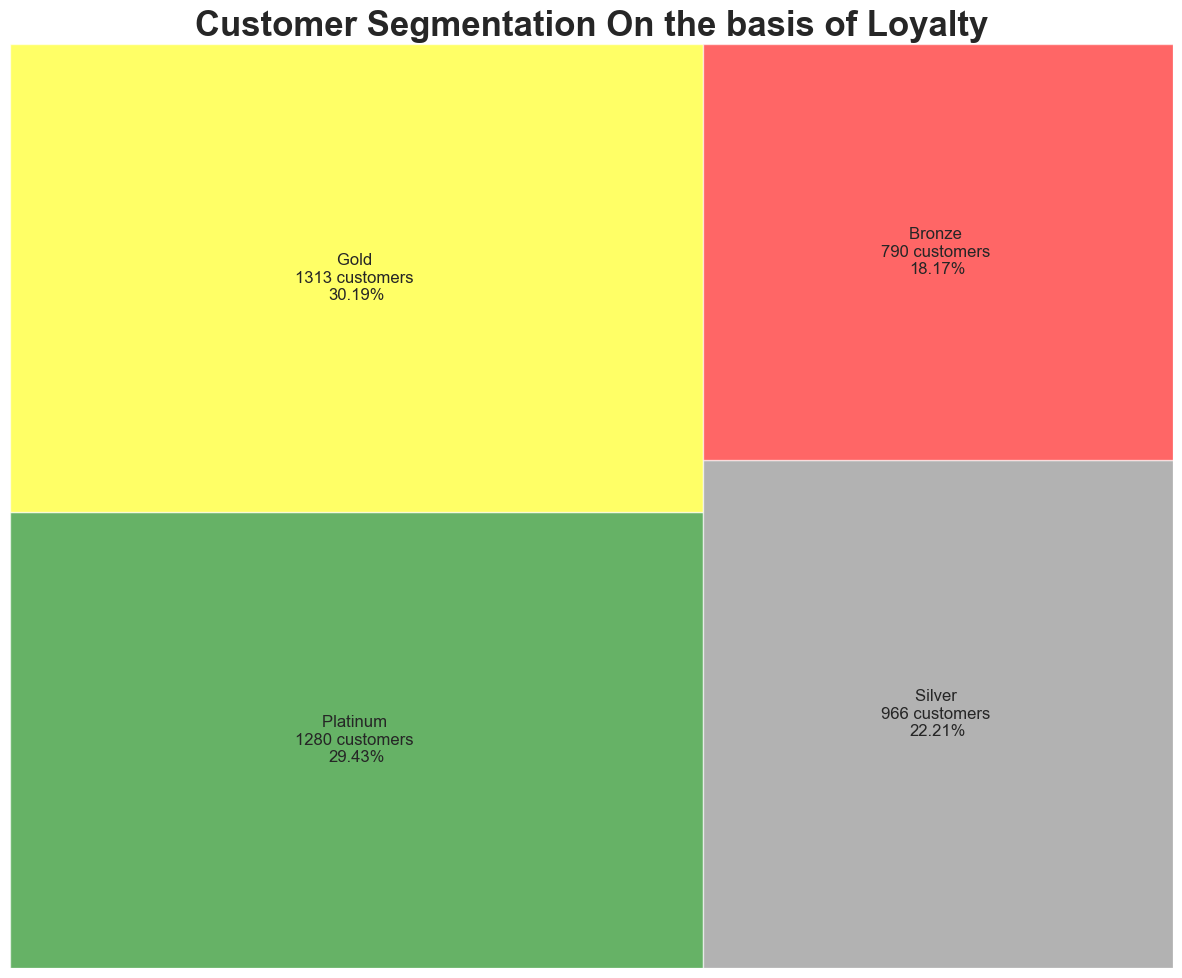

In [68]:
import squarify # to draw a square
fig=plt.gcf()
ax=fig.add_subplot()
fig.set_size_inches(15,12)
colors_dics={'Platinum':'green','Gold':'yellow','Silver':'gray','Bronze':'red'}

squarify.plot(sizes=final_report_1['NumOfBuyers'],color=colors_dics.values(),
             label=['{} \n{:0.0f} customers \n{}%'.format(*final_report_1.iloc[i]) for i in range(0,len(final_report_1))],alpha=0.6)
plt.title('Customer Segmentation On the basis of Loyalty',fontsize=25,fontweight='bold')
plt.axis('off')
plt.show()

In [ ]:
# Learn about hopkin statistic clustering

### Unsupervised Machine Learning - segmentation / clustering / grouping

In [75]:
# Importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster.hierarchy import dendrogram , linkage , fcluster
import scipy.cluster.hierarchy as sch
from datetime import datetime

In [ ]:
# If noise is there , outlier is there then we'll handle it through DBSCAN (google for more info)


In [77]:
RFMApproach.reset_index()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Loyalty_Level
0,0,2.0,4,182,553704.0,1,1,1,3,Platinum
1,1,3.0,77,27,257404.0,3,3,1,7,Gold
2,2,4.0,19,72,176613.0,2,2,2,6,Gold
3,3,5.0,311,16,41976.0,4,4,3,11,Bronze
4,4,6.0,37,84,151822.0,2,2,2,6,Gold
...,...,...,...,...,...,...,...,...,...,...
4344,4344,4368.0,278,10,20480.0,4,4,4,12,Bronze
4345,4345,4369.0,181,7,10774.0,4,4,4,12,Bronze
4346,4346,4370.0,9,13,24962.0,1,4,4,9,Silver
4347,4347,4371.0,4,751,279720.0,1,1,1,3,Platinum


In [79]:
RFMApproach.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM',
       'Loyalty_Level'],
      dtype='object')

In [81]:
df=RFMApproach[['Recency', 'Frequency', 'Monetary']]

In [83]:
df.head()

,Recency,Frequency,Monetary
0,4,182,553704.0
1,77,27,257404.0
2,19,72,176613.0
3,311,16,41976.0
4,37,84,151822.0


In [85]:
# Standardisation (b/c we are doing kmeans - distance based model so scaling reduces the computation time)
scaler = StandardScaler()
rfm_scaled=scaler.fit_transform(df)
rfm_scaled

array([[-0.88687668,  0.38681425,  0.37877278],
       [-0.16187726, -0.28438341,  0.03253314],
       [-0.73790419, -0.08951957, -0.06187471],
       ...,
       [-0.83721918, -0.34500771, -0.2390856 ],
       [-0.88687668,  2.85075918,  0.05861037],
       [-0.48961672, -0.1068408 ,  0.03200496]])

## Part 1 - Customer Segmentation (Kmeans)
### Find Optimal clusters using elbow method

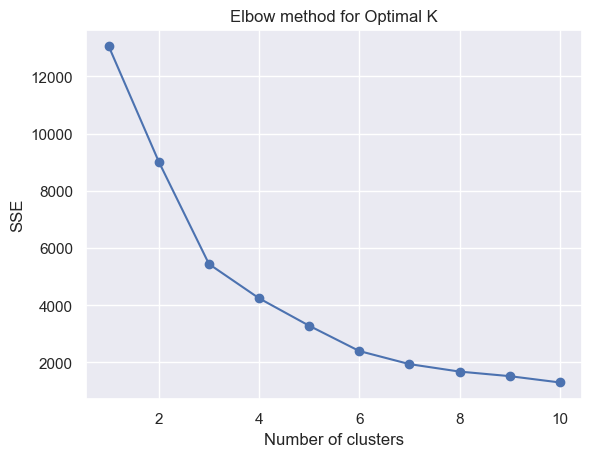

In [93]:
sse=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=101)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_) # distance from centeroid (squared)

plt.plot(range(1,11),sse,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow method for Optimal K')
plt.show()

In [97]:
kmeans=KMeans(n_clusters=5,random_state=42)
df['Kmeans_Cluster']=kmeans.fit_predict(rfm_scaled)

In [99]:
df

,Recency,Frequency,Monetary,Kmeans_Cluster
0,4,182,553704.0,4
1,77,27,257404.0,4
2,19,72,176613.0,4
3,311,16,41976.0,1
4,37,84,151822.0,4
...,...,...,...,...
4344,278,10,20480.0,1
4345,181,7,10774.0,1
4346,9,13,24962.0,4
4347,4,751,279720.0,0


In [121]:
df.Kmeans_Cluster.value_counts(normalize=True) * 100

Kmeans_Cluster
4    67.739710
1    24.465394
0     7.449989
3     0.252932
2     0.091975
Name: proportion, dtype: float64

In [ ]:
# BEST APPROACH IS STILL RFM
# 67% in 1 cluster only , not good , where our majority customers lie in same cluster only

## Part-2 Hierarchial Clustering

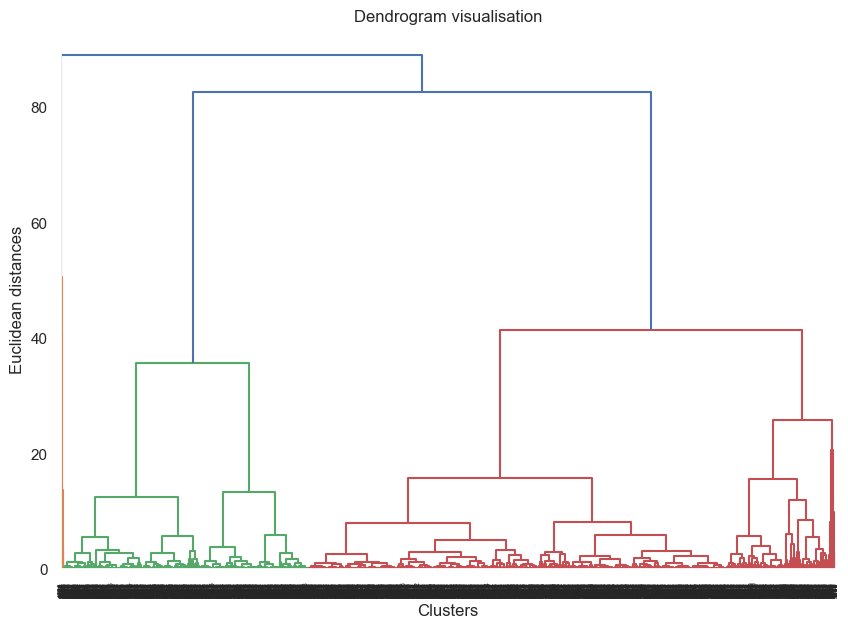

In [109]:
linked=linkage(rfm_scaled,method='ward')# ward will find avg then diatance and then go by minimum distance
plt.figure(figsize=(10,7))
dendrogram(linked)
plt.title('Dendrogram visualisation')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distances')
plt.show()

In [111]:
df['Hierarchial_cluster']=fcluster(linked,6,criterion='maxclust')
df

,Recency,Frequency,Monetary,Kmeans_Cluster,Hierarchial_cluster
0,4,182,553704.0,4,6
1,77,27,257404.0,4,5
2,19,72,176613.0,4,5
3,311,16,41976.0,1,4
4,37,84,151822.0,4,5
...,...,...,...,...,...
4344,278,10,20480.0,1,4
4345,181,7,10774.0,1,4
4346,9,13,24962.0,4,5
4347,4,751,279720.0,0,6


In [119]:
df['Hierarchial_cluster'].value_counts(normalize=True) *100

Hierarchial_cluster
5    53.989423
4    31.593470
6    14.072201
2     0.229938
1     0.091975
3     0.022994
Name: proportion, dtype: float64

## Part-3 DBSCAN

In [126]:
# here epsilon is the radius of a cluster , can also give min points to become a cluster 
dbscan=DBSCAN(eps=1.5, min_samples=5) 
df['DBSCAN_Cluster']=dbscan.fit_predict(rfm_scaled)

In [128]:
df

,Recency,Frequency,Monetary,Kmeans_Cluster,Hierarchial_cluster,DBSCAN_Cluster
0,4,182,553704.0,4,6,0
1,77,27,257404.0,4,5,0
2,19,72,176613.0,4,5,0
3,311,16,41976.0,1,4,0
4,37,84,151822.0,4,5,0
...,...,...,...,...,...,...
4344,278,10,20480.0,1,4,0
4345,181,7,10774.0,1,4,0
4346,9,13,24962.0,4,5,0
4347,4,751,279720.0,0,6,0


In [130]:
df.DBSCAN_Cluster.value_counts()

DBSCAN_Cluster
 0    4330
-1      19
Name: count, dtype: int64

In [ ]:
# -1 means we have to drop these , so maybe they maybe completely outlier inorder to prevent noise capturing
#  Now we can remove -1 data points and on the top of it we can perform any other clustering method

In [ ]:
# In real time you can do and suggest ideas in scrum calls to improve model performance

# Cohort Analysis for customer retention

In [ ]:
# Group all the loyal customers and build plans to retain them , and also helps us to analyse customers who are leaving very quickly
# eg:- group1 - jan batch candidates , group2- feb batch candidates....
# you have to calculate retention % = no.of students still present / total no. of students % 100 
# You have to analyse no. of students rejoining sessions in feb also , march also , etc.

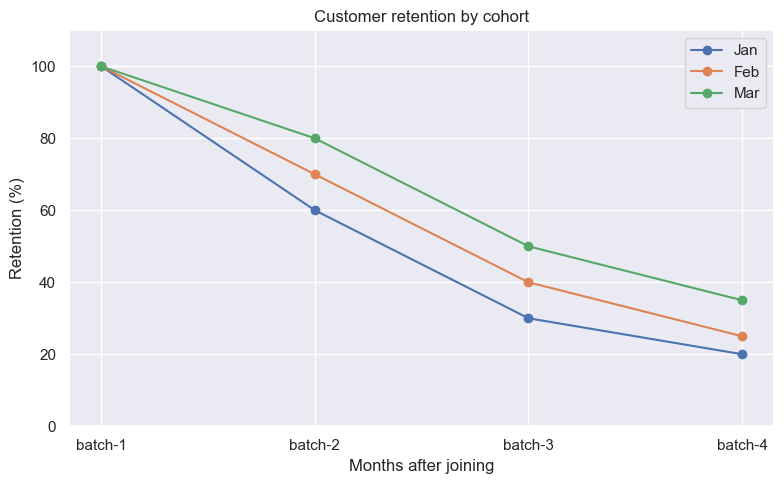

In [137]:
cohorts=['Jan','Feb','Mar']
months=['batch-1','batch-2','batch-3','batch-4']
retention_data=[[100,60,30,20],[100,70,40,25],[100,80,50,35]]
plt.figure(figsize=(8,5))
for i , cohort in enumerate(cohorts):
    plt.plot(months,retention_data[i],marker='o',label=cohort)
plt.title('Customer retention by cohort')
plt.xlabel('Months after joining')
plt.ylabel('Retention (%)')
plt.ylim(0,110)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Analyse how students are decreasing - dropping over months

In [147]:
# orig_data
dataset=pd.read_csv('E-com_data.csv')
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


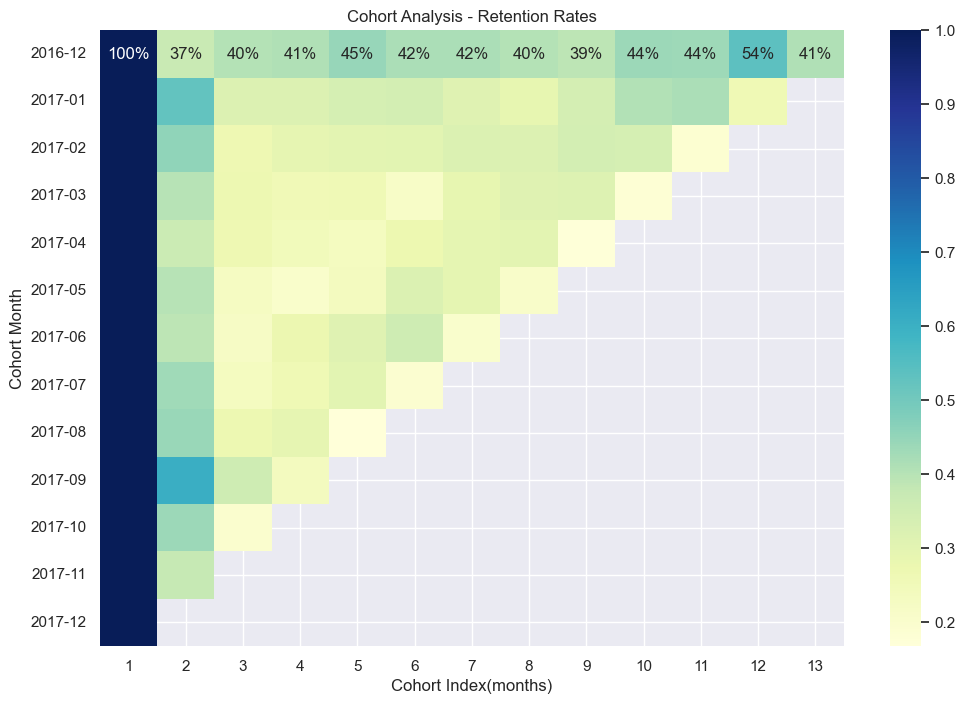

In [155]:
dataset['Date']=pd.to_datetime(dataset['Date of purchase'])
dataset['Month']=dataset['Date'].dt.to_period('M')
dataset['CohortMonth']=dataset.groupby('CustomerID')['Date'].transform('min').dt.to_period('M')

def cohort_index(df):
     year_diff=df['Month'].dt.year - dataset['CohortMonth'].dt.year
     month_diff=df['Month'].dt.month - dataset['CohortMonth'].dt.month
     return year_diff * 12 + month_diff+1

dataset['CohortIndex']= cohort_index(dataset)

cohort_data=dataset.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

cohort_counts=cohort_data.pivot_table(index='CohortMonth',columns='CohortIndex',values='CustomerID')

#Retention Rate
cohort_sizes=cohort_counts.iloc[:,0]
retention=cohort_counts.divide(cohort_sizes,axis=0)

plt.figure(figsize=(12,8))
sns.heatmap(retention,annot=True,fmt='.0%',cmap='YlGnBu')
plt.title('Cohort Analysis - Retention Rates')
plt.xlabel('Cohort Index(months)')
plt.ylabel('Cohort Month')
plt.show()

In [ ]:
 # ALSO PRACTICE STAR Model to explain this project (situation , Task , Actions , Result)